In [2]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize
R = pd.read_csv('./spectrum/R_ToS.csv')['SCAN'].values
file = pd.read_csv('./spectrum/Nanya_ITO_grading.csv')
#ITO = pd.read_csv('./spectrum/Nanya_layer1_R_5.csv')['SCAN'].values
wl = np.linspace(400, 700, 301)
w = file['nm'].values
n_T = file['n_Top'].values
k_T = file['k_Top'].values
n_B = file['n_Bottom'].values
k_B = file['k_Bottom'].values
ITO_T = ml.Material(w, n_T, k_T, w)
ITO_B = ml.Material(w, n_B, k_B, w)

NB_H = pd.read_csv('./spectrum/TEO/NB.csv')
NB_n = NB_H['NB1'].values
NB_k = NB_H['k'].values
ws = NB_H[]
NB_TEO = ml.Material(w, NB_n, NB_k, w)

NB_1 = pd.read_csv('./spectrum/TEO/NB_1.csv')
NBn = NB_1['n'].values
NBk = NB_1['k'].values
NB = ml.Material(w, NBn, NBk, w)

SiO2_1 = pd.read_csv('./spectrum/TEO/SiO2_1.csv')
SiO21n = SiO2_1['n'].values
SiO21k = SiO2_1['k'].values
SiO2_TEO = ml.Material(w, SiO21n, SiO21k, w)

sub =  pd.read_csv('./spectrum/TEO/sodalime.csv')
soda_n = sub['n'].values
soda_k = sub['k'].values
sodalime_Nanya_TEO = ml.Material(w, soda_n, soda_k, w)

air = ml.Non_Dispersion(1)

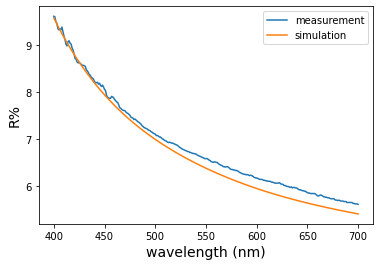

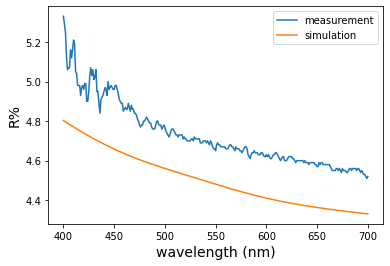

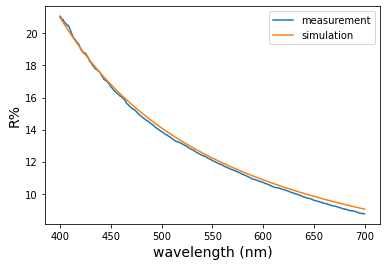

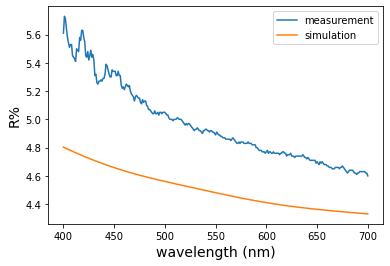

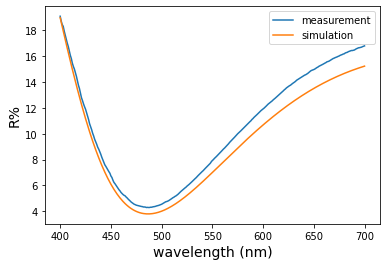

In [14]:
R_L1 = pd.read_csv('./spectrum/ToS/RL1.csv')['SCAN'].values
R_L2 = pd.read_csv('./spectrum/ToS/RL2.csv')['SCAN'].values
R_L3 = pd.read_csv('./spectrum/ToS/RL3.csv')['SCAN'].values
R_L4 = pd.read_csv('./spectrum/ToS/RL4.csv')['SCAN'].values
R_L5 = pd.read_csv('./spectrum/ToS/RL5.csv')['SCAN'].values

L1 = tm.Design(
    [air, NB, sodalime_Nanya_TEO],
    [None, 11, None]
).reflectance(wl,5)

L2 = tm.Design(
    [air, sodalime_Nanya_TEO],
    [None, None]
).reflectance(wl,5)

L3 = tm.Design(
    [air, NB, sodalime_Nanya_TEO],
    [None, 24, None]
).reflectance(wl,5)

L4 = tm.Design(
    [air, sodalime_Nanya_TEO],
    [None, None]
).reflectance(wl,5)

L5 = tm.Design(
    [air, ITO_T, ITO_B, sodalime_Nanya_TEO],
    [None, 84.50993049, 31.61075733, None]
).reflectance(wl,5)

plt.plot(wl, R_L1, label = 'measurement')
plt.plot(wl, 100*L1, label = 'simulation')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('L1.png')
plt.show()
plt.plot(wl, R_L2, label = 'measurement')
plt.plot(wl, 100*L2, label = 'simulation')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('L2.png')
plt.show()
plt.plot(wl, R_L3, label = 'measurement')
plt.plot(wl, 100*L3, label = 'simulation')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('L3.png')
plt.show()
plt.plot(wl, R_L4, label = 'measurement')
plt.plot(wl, 100*L4, label = 'simulation')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('L4.png')
plt.show()
plt.plot(wl, R_L5, label = 'measurement')
plt.plot(wl, 100*L5, label = 'simulation')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.legend(loc = 'best')
#plt.savefig('L5.png')
plt.show()